**AI+X: Deep Learning**

**Midterm Take Home Exam**

**Sungmin Yang**<br>

**Seoul - Dept.of DataScience**<br>

**2020005723**<br>

# Load Data

In [165]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [120]:
lottery = pd.read_csv("lottery.csv")
lottery

,round,date,first,second,third,fourth,fifth,sixth,bonus
0,959,2021.04.17,1,14,15,24,40,41,35
1,958,2021.04.10,2,9,10,16,35,37,1
2,957,2021.04.03,4,15,24,35,36,40,1
3,956,2021.03.27,10,11,20,21,25,41,40
4,955,2021.03.20,4,9,23,26,29,33,8
...,...,...,...,...,...,...,...,...,...
954,5,2003.01.04,16,24,29,40,41,42,3
955,4,2002.12.28,14,27,30,31,40,42,2
956,3,2002.12.21,11,16,19,21,27,31,30
957,2,2002.12.14,9,13,21,25,32,42,2


# Task-1

 Write a statistical analysis script to display the most frequently appeared number 
to the least. Use pandas (http://pandas.pydata.org/) for this task. Please print out your script for 
submission. An alternative way to do this is using Excel, but I strongly suggest that you try 
python and pandas for fun. If you are using Excel, show the step by step making your file. 

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

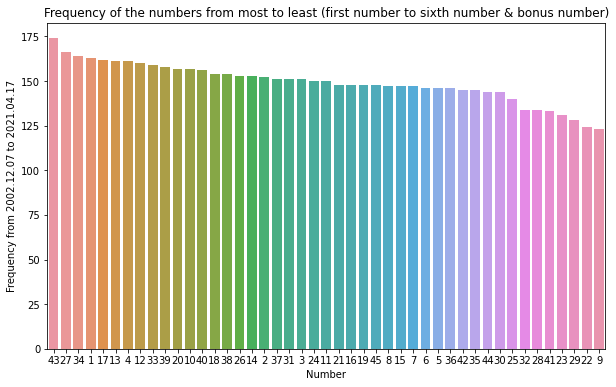

Frequency of the numbers from most to least (first number to sixth number & bonus number)
43:	174 times
27:	166 times
34:	164 times
1:	163 times
17:	162 times
13:	161 times
4:	161 times
12:	160 times
33:	159 times
39:	158 times
20:	157 times
10:	157 times
40:	156 times
18:	154 times
38:	154 times
26:	153 times
14:	153 times
2:	152 times
37:	151 times
31:	151 times
3:	151 times
24:	150 times
11:	150 times
21:	148 times
16:	148 times
19:	148 times
45:	148 times
8:	147 times
15:	147 times
7:	147 times
6:	146 times
5:	146 times
36:	146 times
42:	145 times
35:	145 times
44:	144 times
30:	144 times
25:	140 times
32:	134 times
28:	134 times
41:	133 times
23:	131 times
29:	128 times
22:	124 times
9:	123 times


In [308]:
numbers = []

for order in ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'bonus']:
    numbers.extend(lottery[order])

numbers_cnt = pd.Series(numbers).value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.countplot(numbers, order=numbers_cnt.index)
plt.title("Frequency of the numbers from most to least (first number to sixth number & bonus number)")
plt.xlabel('Number')
plt.ylabel('Frequency from 2002.12.07 to 2021.04.17')
plt.show()

print("Frequency of the numbers from most to least (first number to sixth number & bonus number)")
print("=" * 80)

for i in range(len(numbers_cnt)):
    print("{}:\t{} times".format(numbers_cnt.index[i], numbers_cnt.values[i]))

# Task-2
Create a modified lottery data format by adding a new columns. For example, 
you can add “win” column indicating ‘0’-lose and ‘1’-win. Please add not-winning (fake) 
numbers to each round to your modified lottery dataset. You will be adding ‘0’ for lose for every 
round: ‘1’ for each round. So your new dataset should be double. Your new lottery data set would 
look like the following:

round, date, first, second, third, fourth, fifth, sixth, bonus, win

663,2015.08.15,3,5,8,19,38,42,20,1

663,2015.08.15,1,2,3,4,5,6,7,0

Please print the first 20 lines of your modified data set (including csv header) for submission. If 
you have a source code for doing this, please print them out for submission

In [136]:
import numpy as np

In [298]:
lottery_win = lottery.copy()
lottery_lose = lottery.copy()

is_duplicated_any = True
trial = 0

# To check whether generated fake number lists are distinct from winning number lists (is_duplicated_any)
# generate fake number lists until is_duplicated_any = False

while (is_duplicated_any == True):
    # make fake numbers randomly
    lottery_lose[['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'bonus']] = pd.DataFrame(np.random.randint(1,46, (959,7)))
    is_duplicated_any = bool((lottery_win.iloc[:, 2:] == lottery_lose.iloc[:, 2:]).all(axis=1).any())
    trial += 1
    
print("How many times fake numbers are created, to make distinct number lists (first ~ bonus) from winning number lists:")
print(trial)
lottery_win['win'] = 1
lottery_lose['win'] = 0

my_lottery = pd.concat([lottery_win, lottery_lose], axis=0).sort_index()
my_lottery.head(20)

How many times fake numbers are created, to make distinct number lists (first ~ bonus) from winning number lists:
1


,round,date,first,second,third,fourth,fifth,sixth,bonus,win
0,959,2021.04.17,1,14,15,24,40,41,35,1
0,959,2021.04.17,33,5,45,28,18,32,34,0
1,958,2021.04.10,2,9,10,16,35,37,1,1
1,958,2021.04.10,6,16,22,23,2,38,13,0
2,957,2021.04.03,4,15,24,35,36,40,1,1
2,957,2021.04.03,17,42,22,13,24,2,19,0
3,956,2021.03.27,10,11,20,21,25,41,40,1
3,956,2021.03.27,29,40,30,6,1,37,39,0
4,955,2021.03.20,4,9,23,26,29,33,8,1
4,955,2021.03.20,10,13,31,43,17,11,11,0


# Task-3
K-mean clustering – Use any combination of features in your new 
lottery.csv to group all weekly rounds. For example, you can use the vectors of ‘first’ and 
‘second’ to create 2 clusters (K=2) and provide a clustering graph like the below scikit-learn 
sample source code. Another example is to use the average of all 7 digits to create N-clusters. 
Print out your K-mean analysis source code that creates a cluster figure (just one graph). Within 
your code (comment line), please explain which features and how many clusters you use.

Overview - http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
Sample source code - http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

Python and scikit-learn are recommended. However, you can use any means possible (or 
comfortable for you, like excel, Brightics, or whatever) to complete the task. If you have a source 
code for doing this, please print them out for submission.

In [152]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

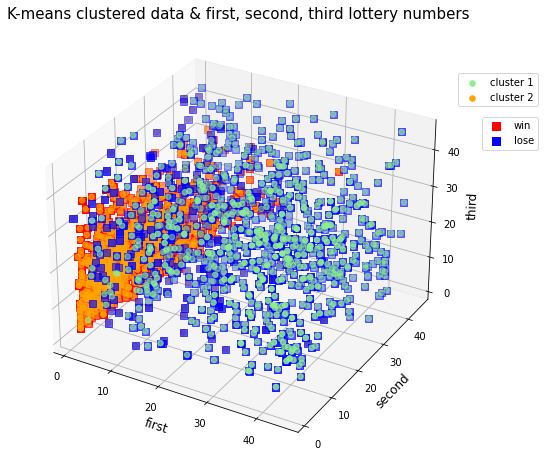

In [306]:
df = my_lottery.iloc[:, 2:]

# Plotting scatterplot of first,second,third lottery numbers

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df[df['win']==1]['first'], ys=df[df['win']==1]['second'], zs=df[df['win']==1]['third'], marker='s', color='red', label='win', s=50)
ax.scatter(xs=df[df['win']==0]['first'], ys=df[df['win']==0]['second'], zs=df[df['win']==0]['third'], marker='s', color='blue', label='lose', s=50)
leg1 = ax.legend(['win', 'lose'], bbox_to_anchor=(1,0.7,0.2,0.1))

# Kmeans clustering plot

model = KMeans(n_clusters=2, random_state=0)
model.fit(df)
pred = model.predict(df)

df['pred'] = pred
cluster1 = ax.scatter(xs=df[df['pred']==1]['first'], ys=df[df['pred']==1]['second'], zs=df[df['pred']==1]['third'], marker='o', color='lightgreen', label='cluster 1', s=30)
cluster2 = ax.scatter(xs=df[df['pred']==0]['first'], ys=df[df['pred']==0]['second'], zs=df[df['pred']==0]['third'], marker='o', color='orange', label='cluster 2', s=30)
leg2 = ax.legend([cluster1, cluster2], ['cluster 1', 'cluster 2'], bbox_to_anchor=(1,0.8,0.2,0.1))
ax.add_artist(leg1)

plt.title("K-means clustered data & first, second, third lottery numbers", fontsize=15)
ax.set_xlabel("first", fontsize=12)
ax.set_ylabel("second", fontsize=12)
ax.set_zlabel("third", fontsize=12)

plt.show()

# Task-4
Write one paragraph explaining your tasks and any difficulties you had. (several 
sentences should be enough.) Even if you can’t do the whole assignment, submit as much as you 
can (with explanation why you can’t do this).

Explanation of the codes<br>

Task-1:
1. create list of winning numbers among first,second,third,fourth,fifth,sixth and bonus from 1st round to 959th round (numbers)
2. make that list as Series in order to use sort_values() method ; then apply sort_values() method (numbers_cnt)
3. countplot graph is attached to intuitively understand frequency distribution

Task-2:
1. make two copies (lottery_win, lottery_lose) from original lottery.csv dataframe
2. until all of the lottery number lists (first ~ bonus) are different between lottery_win and lottery_lose, randomly generate fake lottery number lists to lottery_lose, using np.random.randint
3. concatenate lottery_win and lottery_lose row-wise and use sort_index() method, to display in round order 

Task-3:
1. I am going to compare clustered labels and actual win & false labels from the 3-D scatterplot of first, second, third lottery numbers
2. First, make 3-D scatterplot of first,second,third lottery numbers in square markers, labeled with 'win' & 'false' - {'win': marked in red, 'lose': marked in blue}
3. Second, after applying K-Means clustering model, make 3-D scatterplot of first, second, third lottery numbers in circle markers, labeled with 'cluster 1' & 'cluster 2' - {'cluster 1': marked in lightgreen, 'cluster 2': marked in orange}
4. display 3-D scatterplots at 2nd & 3rd step at once